In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/combine_19_20_21_sale.xlsx')

In [ ]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Created Date', 'TMAX', 'Completed_Jobs', 'tech_count',
       'Avg_Sales', 'Zip_income', 'Income'],
      dtype='object')

In [ ]:
df1=df[['Created Date','Completed_Jobs','TMAX','tech_count','Avg_Sales','Zip_income','Income']]

In [ ]:
df1=df1.drop_duplicates(ignore_index=True)

In [ ]:
df1.shape

(726, 7)

In [ ]:
df1['year'] = df1['Created Date'].dt.year
df1['month'] = df1['Created Date'].dt.month
df1['day'] = df1['Created Date'].dt.day


df1['weekday'] = df1['Created Date'].dt.dayofweek

df1['quarter'] = df1['Created Date'].dt.quarter

In [ ]:
df1=df1.drop(['Created Date'],axis=1)

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [ ]:
encode(df1,'month',12)
encode(df1,'day',365)
encode(df1,'weekday',7)
encode(df1,'quarter',4)

,Completed_Jobs,TMAX,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,90,68,42,6583.000000,100885.000000,100885.00,2019,1,3,3,1,0.500000,0.866025,0.051620,0.998667,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,85,69,46,6542.500000,112823.177778,25694.20,2019,1,4,4,1,0.500000,0.866025,0.068802,0.997630,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,82,53,22,11057.800000,92705.000000,92705.00,2019,1,5,5,1,0.500000,0.866025,0.085965,0.996298,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,16,58,12,5815.000000,41483.776667,14062.00,2019,1,6,6,1,0.500000,0.866025,0.103102,0.994671,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,89,60,63,7918.583333,108119.473333,109814.00,2019,1,7,0,1,0.500000,0.866025,0.120208,0.992749,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,222,81,126,3494.939333,210099.110000,210099.11,2021,4,30,4,2,0.866025,-0.500000,0.493776,0.869589,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,168,68,75,4079.521639,119775.950000,119775.95,2021,5,1,5,2,0.500000,-0.866025,0.017213,0.999852,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,202,69,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,109,68,75,4314.042857,112431.950000,112431.95,2021,5,8,5,2,0.500000,-0.866025,0.137279,0.990532,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [ ]:
df1['year'] = df1['year'].map({2019: 0, 2020: 1,2021:2})

In [ ]:
df1=df1.drop_duplicates(ignore_index=True)

In [ ]:
df1.shape

(726, 19)

In [ ]:
df1.head()

,Completed_Jobs,TMAX,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,90,68,42,6583.000000,100885.000000,100885.0,0,1,3,3,1,0.5,0.866025,0.051620,0.998667,0.433884,-0.900969,1.0,6.123234e-17
1,85,69,46,6542.500000,112823.177778,25694.2,0,1,4,4,1,0.5,0.866025,0.068802,0.997630,-0.433884,-0.900969,1.0,6.123234e-17
2,82,53,22,11057.800000,92705.000000,92705.0,0,1,5,5,1,0.5,0.866025,0.085965,0.996298,-0.974928,-0.222521,1.0,6.123234e-17
3,16,58,12,5815.000000,41483.776667,14062.0,0,1,6,6,1,0.5,0.866025,0.103102,0.994671,-0.781831,0.623490,1.0,6.123234e-17
4,89,60,63,7918.583333,108119.473333,109814.0,0,1,7,0,1,0.5,0.866025,0.120208,0.992749,0.000000,1.000000,1.0,6.123234e-17


In [ ]:
df1.head()

,Completed Jobs,TMAX,tech_count,Avg Sales,Income_y,Zip_income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,57,65,59,3617.444828,23933.54,23933.540,0,1,2,3,1,0.5,0.866025,0.034422,0.999407,0.433884,-0.900969,1.0,6.123234e-17
1,77,71,40,1781.345385,65232.03,74498.870,0,1,3,4,1,0.5,0.866025,0.051620,0.998667,-0.433884,-0.900969,1.0,6.123234e-17
2,55,69,21,459.248750,26195.32,110329.465,0,1,4,5,1,0.5,0.866025,0.068802,0.997630,-0.974928,-0.222521,1.0,6.123234e-17
3,6,69,9,846.000000,264.00,32925.410,0,1,5,6,1,0.5,0.866025,0.085965,0.996298,-0.781831,0.623490,1.0,6.123234e-17
4,73,77,60,1820.060789,48506.16,83225.340,0,1,6,0,1,0.5,0.866025,0.103102,0.994671,0.000000,1.000000,1.0,6.123234e-17


In [ ]:
df1['f1']=np.abs(df1['Completed_Jobs'])*np.abs(df1['Zip_income'])
df1['f2']=np.sqrt(df1['Completed_Jobs']**3)*np.abs(df1['Avg_Sales'])
df1['f3']=np.abs(np.sqrt(df1['Completed_Jobs']) - np.sqrt(df1['tech_count']))
df1['f4']=np.log(np.sqrt(df1['Completed_Jobs'])*df1['TMAX']**3)

In [ ]:
df1.columns

Index(['Completed_Jobs', 'TMAX', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income', 'year', 'month', 'day', 'weekday', 'quarter', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'weekday_sin', 'weekday_cos',
       'quarter_sin', 'quarter_cos', 'f1', 'f2', 'f3', 'f4'],
      dtype='object')

In [ ]:
df2=df1[['Completed_Jobs', 'TMAX', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


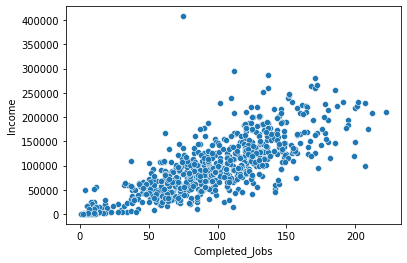

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


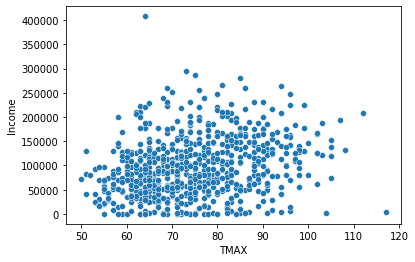

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


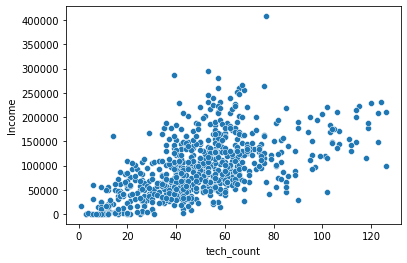

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


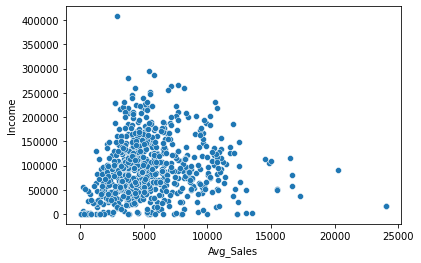

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


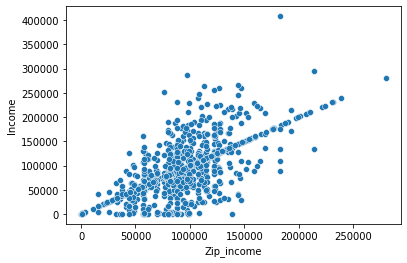

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


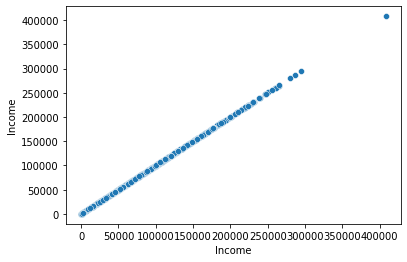

In [ ]:
for i in df2.columns:
    sns.scatterplot(df2[i],df2['Income'])
    plt.show()

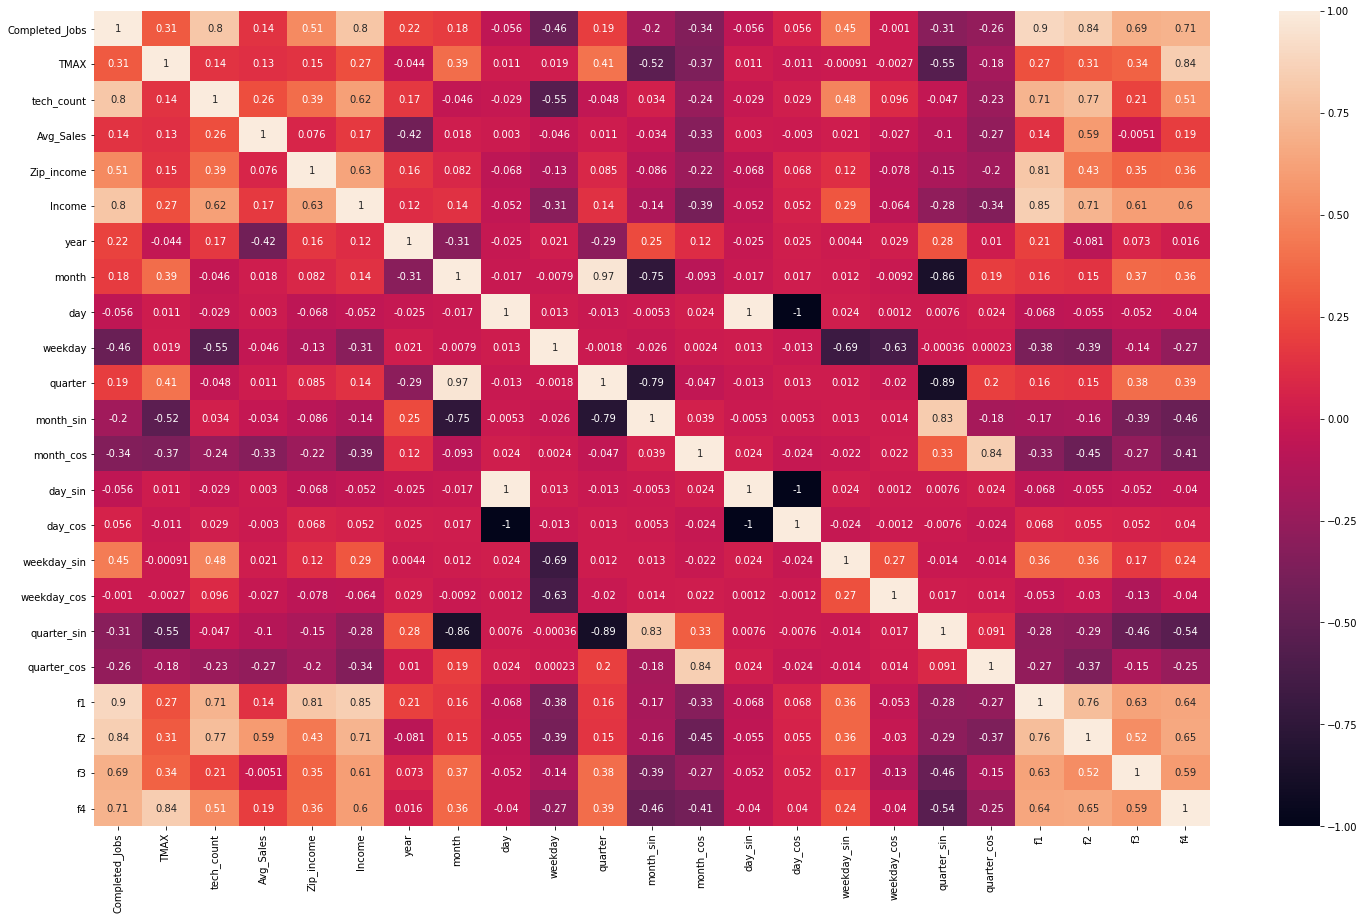

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [ ]:
df1.columns

Index(['Completed_Jobs', 'TMAX', 'tech_count', 'Avg_Sales', 'Zip_income',
       'Income', 'year', 'month', 'day', 'weekday', 'quarter', 'month_sin',
       'month_cos', 'day_sin', 'day_cos', 'weekday_sin', 'weekday_cos',
       'quarter_sin', 'quarter_cos', 'f1', 'f2', 'f3', 'f4'],
      dtype='object')

In [ ]:
df2

,Completed_Jobs,TMAX,tech_count,Avg_Sales,Zip_income,Income
0,90,68,42,6583.000000,100885.000000,100885.00
1,85,69,46,6542.500000,112823.177778,25694.20
2,82,53,22,11057.800000,92705.000000,92705.00
3,16,58,12,5815.000000,41483.776667,14062.00
4,89,60,63,7918.583333,108119.473333,109814.00
...,...,...,...,...,...,...
721,222,81,126,3494.939333,210099.110000,210099.11
722,168,68,75,4079.521639,119775.950000,119775.95
723,202,69,124,3481.447857,230699.430000,230699.43
724,109,68,75,4314.042857,112431.950000,112431.95


In [ ]:
train=df2[0:650]
test=df2[650:]

In [ ]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [ ]:
X.head()

,Completed_Jobs,TMAX,tech_count,Avg_Sales,Zip_income
0,90,68,42,6583.000000,100885.000000
1,85,69,46,6542.500000,112823.177778
2,82,53,22,11057.800000,92705.000000
3,16,58,12,5815.000000,41483.776667
4,89,60,63,7918.583333,108119.473333


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler




In [ ]:
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
X

array([[0.42180095, 0.26865672, 0.33606557, 0.27164821, 0.36038977],
       [0.39810427, 0.28358209, 0.36885246, 0.26995433, 0.40307355],
       [0.38388626, 0.04477612, 0.17213115, 0.45880316, 0.33114298],
       ...,
       [0.59241706, 0.32835821, 0.77868852, 0.23992344, 0.433485  ],
       [0.49763033, 0.43283582, 0.53278689, 0.10275816, 0.54079485],
       [1.        , 0.47761194, 1.        , 0.197509  , 0.54079485]])

In [ ]:

y=y.values
y=y.reshape(-1,1)

In [ ]:

y=scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim =5))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='MeanSquaredError', metrics = ['MeanSquaredError'])


In [ ]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test,y_test))


Epoch 1/100
17/17 [==============================] - 1s 15ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7/100
17/17 [==============

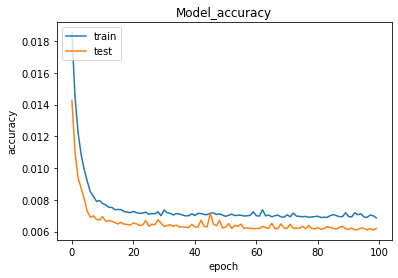

In [ ]:
# Accuracy plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

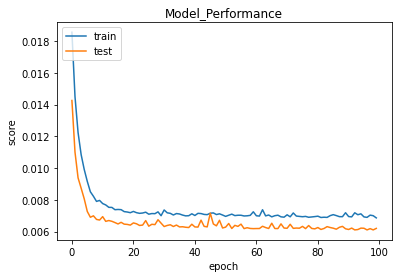

In [ ]:
# Accuracy plot 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model_Performance')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:

y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [ ]:
X_.isnull().sum()

Completed_Jobs    0
TMAX              0
tech_count        0
Avg_Sales         0
Zip_income        0
dtype: int64

In [ ]:


X_=scaler.fit_transform(X_)


In [ ]:
y_pred_1 = model.predict(X_test)

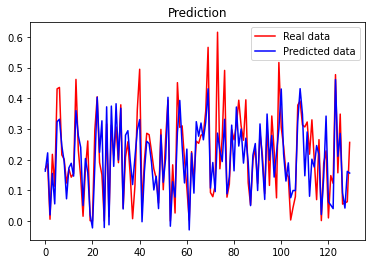

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
y_pred_2=model.predict(X_)

In [ ]:
y_=y_.values
y_=y_.reshape(-1,1)

In [ ]:
y_=scaler.fit_transform(y_)

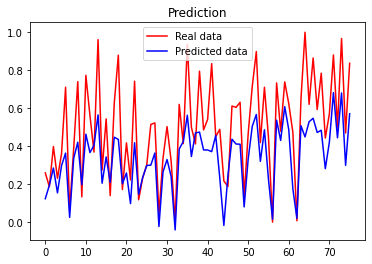

In [ ]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
y_pred_2=scaler.inverse_transform(y_pred_2)

In [ ]:
y_pred_2

array([[ 30149.275 ],
       [ 46930.234 ],
       [ 68568.93  ],
       [ 37487.195 ],
       [ 71533.32  ],
       [ 87239.28  ],
       [  6784.1465],
       [ 80707.18  ],
       [100805.99  ],
       [ 47739.87  ],
       [110881.34  ],
       [ 87911.42  ],
       [ 96887.05  ],
       [135065.84  ],
       [ 49586.434 ],
       [ 82425.73  ],
       [ 50545.133 ],
       [107116.625 ],
       [104379.91  ],
       [ 48844.02  ],
       [ 62355.953 ],
       [ 24059.84  ],
       [100236.68  ],
       [ 35718.293 ],
       [ 56789.773 ],
       [ 71742.1   ],
       [ 72169.74  ],
       [ 87331.56  ],
       [ -4648.645 ],
       [ 63616.418 ],
       [ 79194.69  ],
       [ 58198.73  ],
       [ -8911.945 ],
       [ 92438.68  ],
       [101626.33  ],
       [134590.62  ],
       [ 82990.85  ],
       [112487.65  ],
       [113524.11  ],
       [ 91219.89  ],
       [ 91146.36  ],
       [ 89093.55  ],
       [109308.555 ],
       [ 56053.145 ],
       [ -3304.9397],
       [ 5

In [ ]:
y_=scaler.inverse_transform(y_)

In [ ]:
y_

array([[ 62484.03],
       [ 45289.92],
       [ 95437.44],
       [ 55735.08],
       [ 86421.8 ],
       [169704.71],
       [ 15788.  ],
       [ 93402.16],
       [176747.02],
       [ 32502.4 ],
       [184596.28],
       [134536.85],
       [ 88538.89],
       [229287.8 ],
       [ 66133.39],
       [130104.24],
       [ 33965.63],
       [150308.59],
       [209836.47],
       [ 41631.57],
       [100081.2 ],
       [ 53637.35],
       [177199.56],
       [ 28791.98],
       [ 56282.45],
       [ 72449.57],
       [123026.81],
       [125056.66],
       [ 11276.  ],
       [ 80566.49],
       [120399.05],
       [ 78081.9 ],
       [  1154.  ],
       [148213.68],
       [ 99126.1 ],
       [223445.37],
       [119595.03],
       [ 98708.05],
       [189796.22],
       [116284.92],
       [129378.3 ],
       [199174.66],
       [107821.05],
       [116983.  ],
       [ 52330.2 ],
       [ 45401.14],
       [146179.99],
       [144461.57],
       [150804.58],
       [ 33183.75],


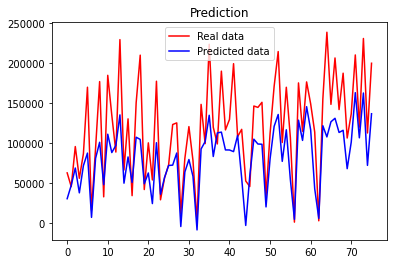

In [ ]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_,y_pred_2)

39251.34598799857

In [ ]:
np.sqrt(mean_squared_error(y_,y_pred_2))

48691.379052882214

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_1))

0.07340617245899281

In [ ]:
from keras.models import load_model

In [ ]:

model.save('forecast_2.h5')

In [ ]:
loading_1=load_model('forecast_2.h5')

In [ ]:
X_

array([[0.52241812, 0.68859809, 0.79102319, 0.67214285],
       [0.52642138, 0.67349766, 0.65554292, 0.83360014],
       [0.67513297, 0.67349766, 0.65554292, 0.83360014],
       [0.45630525, 0.58687169, 0.59062548, 0.8288121 ],
       [0.4567308 , 0.75608042, 0.42007018, 0.69813427],
       [0.39492514, 0.77286356, 0.87307248, 0.7108141 ],
       [0.07941123, 0.17411476, 0.55667537, 0.68248803],
       [0.        , 0.        , 0.28203263, 0.17393212],
       [0.32611525, 0.33029152, 0.55609603, 0.95268991],
       [0.33222062, 0.53204327, 0.54478914, 0.83271632],
       [0.21392247, 0.3080608 , 0.37439677, 0.64453168],
       [0.39246045, 0.96990221, 0.25411496, 0.50026381],
       [0.67920757, 0.61357573, 0.7005986 , 0.66230563],
       [0.4829689 , 0.66266605, 0.64466888, 0.7735046 ],
       [0.33120827, 0.63033454, 0.66675513, 0.6941767 ],
       [0.31134686, 0.39077976, 0.45830615, 0.59791859],
       [0.74230113, 0.85040239, 0.51060264, 0.6596549 ],
       [1.        , 0.61362657,

In [ ]:

p=loading_1.predict([[0.25017035, 0.59841874, 0.39976689, 0.70064452]])


In [ ]:
scaler.inverse_transform(p)

array([[74893.22]], dtype=float32)

In [ ]:
df1[340:]

,f1,f2,f3,f4,Income_y
340,1.156209e+06,7.217802e+03,0.464102,13.987939,55111.85
341,1.694864e+07,1.055942e+06,3.928932,15.310091,133042.85
342,1.507665e+07,1.757703e+06,3.090537,15.194132,88538.89
343,7.247855e+06,1.126965e+06,2.220042,14.950492,66133.39
344,6.105264e+06,1.623708e+06,2.397964,14.869508,67090.81


In [ ]:
X_[11:20]

array([[0.68181818, 0.57142857, 0.89189189, 0.26351954],
       [0.65584416, 0.54545455, 0.64864865, 0.49953046],
       [0.31818182, 0.20779221, 0.51351351, 0.89144246],
       [0.64285714, 0.80519481, 0.08108108, 1.        ],
       [0.81818182, 0.62337662, 0.27027027, 0.40262763],
       [0.75974026, 0.5974026 , 0.48648649, 0.50006332],
       [0.67532468, 0.46753247, 0.37837838, 0.57610091],
       [0.37662338, 0.23376623, 0.37837838, 0.88138651],
       [0.80519481, 0.79220779, 0.27027027, 0.60106925]])

In [ ]:
!pip install -U keras-tuner


     |████████████████████████████████| 71kB 5.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=256fa61f94b8d776d42ce5d00ac31a17f9eb68b8196b4d4d5e44b61cc6741237
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=afba95d20d08ce133eb2fb7ad34d6c194fcec70a8ce5e965e004d9c2173e9336
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner.tuners import RandomSearch


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=7,
                                            max_value=512,
                                            step=4),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='MeanSquaredError',
        metrics=['MeanSquaredError'])
    return model

In [ ]:
from tensorflow import keras
from kerastuner import HyperModel
import kerastuner as kt
import tensorflow as tf

In [ ]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3)


In [ ]:
X_train

array([[0.35545024, 0.40298507, 0.31967213, 0.16401915, 0.21877819],
       [0.27488152, 0.13432836, 0.24590164, 0.29776742, 0.192638  ],
       [0.39810427, 0.37313433, 0.35245902, 0.20338195, 0.10929284],
       ...,
       [0.37914692, 0.26865672, 0.24590164, 0.12731527, 0.19976769],
       [0.04739336, 0.32835821, 0.1147541 , 0.18570219, 0.01014588],
       [0.37914692, 0.26865672, 0.42622951, 0.4178604 , 0.50988777]])

In [ ]:
tuner.search(X_train,y_train,epochs=100,validation_data= (X_test,y_test))


Trial 10 Complete [00h 02m 37s]
val_loss: 0.018238934377829235

Best val_loss So Far: 0.006086306801686685
Total elapsed time: 00h 18m 19s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 7
units_0: 475
units_1: 91
learning_rate: 0.01
units_2: 7
units_3: 7
units_4: 7
units_5: 7
units_6: 7
Score: 0.006086306801686685
Trial summary
Hyperparameters:
num_layers: 9
units_0: 43
units_1: 235
learning_rate: 0.0001
units_2: 487
units_3: 239
units_4: 215
units_5: 215
units_6: 467
units_7: 7
units_8: 7
Score: 0.0061008501797914505
Trial summary
Hyperparameters:
num_layers: 7
units_0: 187
units_1: 483
learning_rate: 0.01
units_2: 435
units_3: 159
units_4: 431
units_5: 259
units_6: 359
units_7: 223
units_8: 59
units_9: 135
units_10: 15
units_11: 431
units_12: 275
units_13: 255
units_14: 459
units_15: 487
units_16: 163
units_17: 231
units_18: 343
units_19: 111
units_20: 235
units_21: 199
units_22: 319
units_23: 415
units_24: 339
units_25: 243
units_26: 363
units_27: 271
units_28: 183
Score: 0.006141531902054946
Trial summary
Hyper

In [ ]:
from keras.optimizers import Adam

In [ ]:
num_layers: 7
units_0: 475
units_1: 91
learning_rate: 0.01
units_2: 7
units_3: 7
units_4: 7
units_5: 7
units_6: 7

In [ ]:
model = Sequential()
model.add(Dense(475, activation = 'relu', input_dim =5))
model.add(Dense(91, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))



model.add(Dense(1,activation = 'linear'))
model.compile(optimizer=Adam(lr=0.01), loss='MeanSquaredError', metrics = ['MeanSquaredError'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
17/17 [==============================] - 1s 24ms/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 7/100
17/17 [==============

In [ ]:
y_pr=model.predict(X_)

In [ ]:
y_pr=scaler.inverse_transform(y_pr)

In [ ]:
y_pr

array([[ 52432.473  ],
       [ 51431.367  ],
       [ 45505.137  ],
       [ 82611.42   ],
       [ 87497.27   ],
       [103438.516  ],
       [ 69145.734  ],
       [ 42115.88   ],
       [ 96868.75   ],
       [121285.586  ],
       [ 54218.734  ],
       [ 72125.1    ],
       [ 29330.639  ],
       [  3684.0059 ],
       [ 79607.49   ],
       [ 69299.73   ],
       [ 71886.76   ],
       [ 67170.38   ],
       [ 36755.492  ],
       [  5924.9404 ],
       [ 52910.035  ],
       [ 64654.527  ],
       [ 76410.38   ],
       [ 47703.008  ],
       [ 57907.42   ],
       [ 68765.68   ],
       [ 23063.178  ],
       [  -910.99536],
       [105730.7    ],
       [ 86836.2    ],
       [ 86876.6    ],
       [ 34721.97   ],
       [  3791.4402 ],
       [ 88036.97   ],
       [ 92628.63   ],
       [ 58164.855  ],
       [ 51604.17   ],
       [ 33367.727  ],
       [ 87730.45   ],
       [ 85112.3    ],
       [ 83455.08   ],
       [114125.82   ],
       [117514.59   ],
       [ 46

In [ ]:
y_

array([[ 62484.03],
       [ 45289.92],
       [ 95437.44],
       [ 55735.08],
       [ 86421.8 ],
       [169704.71],
       [ 15788.  ],
       [ 93402.16],
       [176747.02],
       [ 32502.4 ],
       [184596.28],
       [134536.85],
       [ 88538.89],
       [229287.8 ],
       [ 66133.39],
       [130104.24],
       [ 33965.63],
       [150308.59],
       [209836.47],
       [ 41631.57],
       [100081.2 ],
       [ 53637.35],
       [177199.56],
       [ 28791.98],
       [ 56282.45],
       [ 72449.57],
       [123026.81],
       [125056.66],
       [ 11276.  ],
       [ 80566.49],
       [120399.05],
       [ 78081.9 ],
       [  1154.  ],
       [148213.68],
       [ 99126.1 ],
       [223445.37],
       [119595.03],
       [ 98708.05],
       [189796.22],
       [116284.92],
       [129378.3 ],
       [199174.66],
       [107821.05],
       [116983.  ],
       [ 52330.2 ],
       [ 45401.14],
       [146179.99],
       [144461.57],
       [150804.58],
       [ 33183.75],


In [ ]:
 y_

array([[1.1453421e+05],
       [1.2741210e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.2898555e+05],
       [9.3402160e+04],
       [1.7674702e+05],
       [3.2502400e+04],
       [5.5111850e+04],
       [1.330428

In [ ]:
np.sqrt(mean_squared_error(y_,y_pr))

46269.56388243844

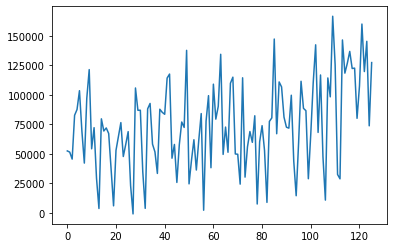

In [ ]:
plt.plot(y_pr)
plt.show()

In [ ]:
y

In [ ]:
model.save('forecast_nueral_fs.h5')

In [ ]:
loading_3=load_model('forecast_nueral_fs.h5')

In [ ]:
pr=loading_3.predict([[0.25017035, 0.59841874, 0.39976689, 0.70064452]])

In [ ]:
scaler.inverse_transform(pr)

array([[69674.79]], dtype=float32)

In [ ]:
X_[40:50]

array([[0.01468342, 0.00694429, 0.12743328, 0.        ],
       [0.82016379, 1.        , 0.77304533, 0.51617891],
       [0.49793805, 0.91404707, 0.61161885, 0.63505825],
       [0.60776264, 0.48684928, 0.53719036, 0.70232676],
       [0.04112142, 0.15544443, 0.49817451, 0.45687425],
       [0.0462717 , 0.00254049, 0.        , 0.40621443],
       [0.6969122 , 0.38912627, 0.71624789, 0.84779231],
       [0.61978718, 0.64781259, 0.54293519, 0.80906391],
       [0.29724454, 0.415307  , 0.36298704, 0.72769212],
       [0.25017035, 0.59841874, 0.39976689, 0.70064452]])

In [ ]:
y_[40:50]

array([[ 15788.  ],
       [128985.55],
       [ 93402.16],
       [176747.02],
       [ 32502.4 ],
       [ 55111.85],
       [133042.85],
       [ 88538.89],
       [ 66133.39],
       [ 67090.81]])